##### How is the education in the BRICS countries?
This project analyzes Education across the BRICS countries, Brazil, Russia, India, China and South Africa, on the last years.


The World Development Indicators from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world. This data is available at Kaagle, https://www.kaggle.com/worldbank/world-development-indicators


###### Loading packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

###### Loading data

In [2]:
data = pd.read_csv('indicators.csv')

###### Exploring data

In [18]:
print(data.head())
print(data.info())
print(data.dtypes)


  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int

In [24]:
# Listing number of indicators
print("Number of indicators: ", data.IndicatorName.nunique())

Number of indicators:  1344


* What are the Indicators?

In [25]:
# list(data.IndicatorName.unique())

* Filtering indicators related to Education

In [11]:
edu_mask = data.IndicatorName.str.contains("%&education|literacy")
data_edu = data[edu_mask]

In [16]:
# Listing number of indicators related to Education and on %
print("Number of rate indicators related to Education: ", data_edu.IndicatorName.nunique())


Number of rate indicators related to Education:  7


In [14]:
# Listing potential indicators
print("Potential indicators: ", data_edu.IndicatorName.unique())

Potential indicators:  ['Adult literacy rate, population 15+ years, both sexes (%)'
 'Adult literacy rate, population 15+ years, female (%)'
 'Adult literacy rate, population 15+ years, male (%)'
 'Youth literacy rate, population 15-24 years, both sexes (%)'
 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)']


###### Plotting data
 For the indicators that all countries have data.

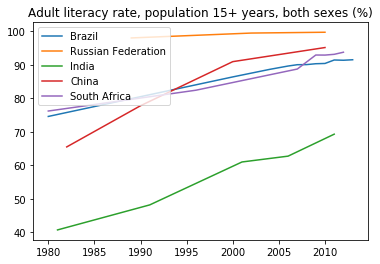

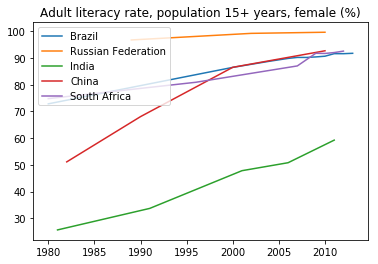

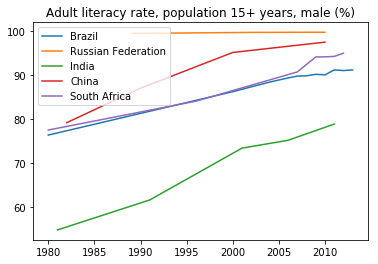

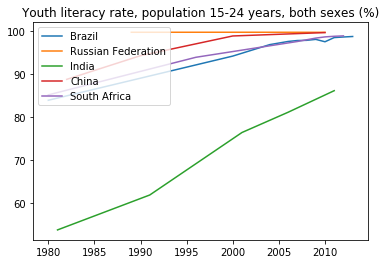

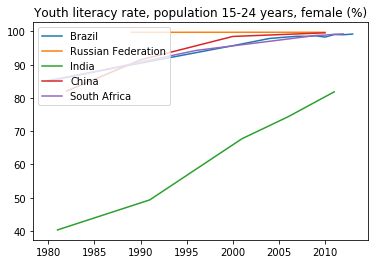

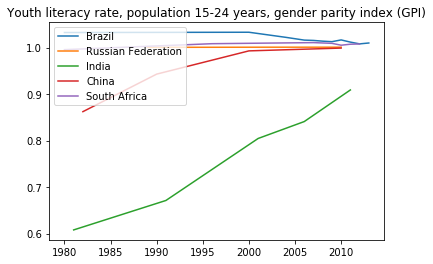

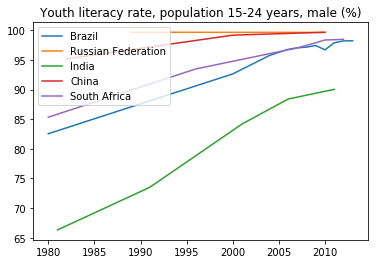

[None, None, None, None, None, None, None]

In [9]:
list_indicators = data_edu.IndicatorName.unique()

# Filter data for the BRIC countries
df_BRA = data_edu[data_edu['CountryCode']=="BRA"]
df_RUS = data_edu[data_edu['CountryCode']=="RUS"]
df_IND = data_edu[data_edu['CountryCode']=="IND"]
df_CHN = data_edu[data_edu['CountryCode']=="CHN"]
df_ZAF = data_edu[data_edu['CountryCode']=="ZAF"]

def comparison_plot(indicator):
    dp_BRA = df_BRA[['IndicatorName', 'Year', 'Value']][df_BRA['IndicatorName'] == indicator]
    dp_RUS = df_RUS[['IndicatorName', 'Year', 'Value']][df_RUS['IndicatorName'] == indicator]
    dp_IND = df_IND[['IndicatorName', 'Year', 'Value']][df_IND['IndicatorName'] == indicator]
    dp_CHN = df_CHN[['IndicatorName', 'Year', 'Value']][df_CHN['IndicatorName'] == indicator]
    dp_ZAF = df_ZAF[['IndicatorName', 'Year', 'Value']][df_ZAF['IndicatorName'] == indicator]

    # Plot only if there is data for all countries
    if ((len(dp_BRA) > 0) & (len(dp_RUS) > 0) & (len(dp_IND) > 0) & (len(dp_CHN) > 0)  & (len(dp_ZAF) > 0)):
        plt.title(indicator)
        plt.plot(dp_BRA['Year'].values, dp_BRA['Value'].values, label='Brazil')
        plt.plot(dp_RUS['Year'].values, dp_RUS['Value'].values, label='Russian Federation')
        plt.plot(dp_IND['Year'].values, dp_IND['Value'].values, label='India')
        plt.plot(dp_CHN['Year'].values, dp_CHN['Value'].values, label='China')
        plt.plot(dp_ZAF['Year'].values, dp_ZAF['Value'].values, label='South Africa')
        plt.legend(loc=2)
        plt.show()

# Plotting data for all Education related indicators
[comparison_plot(ind) for ind in list_indicators]


#### Analysis

* Few indicators related to Education have data for all 5 countries.

* Adult literacy rate, population 15+ years, both sexes (%).
All countries except Russia have improved considerably from 1980 to 2010. 
India was the most behind country on the 80's with only 40% and it is still behind the other countries. On 2010, the rate is almost 70% while the other countries are around 90%.
The Russia's data show almost 100% literacy and it keeps flat across the years. It agrees with efforts on the 1920's in the Soviet Russia and Soviet Union to combat illiteracy. More on this topic on https://en.wikipedia.org/wiki/Likbez

* On Adult literacy rate for 15+ years, female (%).
All countries start with lower percentages except for Russia.
On the 80's, China had only 50% while India was only 25%.
On 2010, India is below 60% while Brazil, China, and South Africa reachs 90%.
India has a gap. It started below the other countries and even with a positive trend it remains far behind other countries.
Russia's data is flat and close to 100%.

* On Adult literacy rate for 15+ years, male (%).
This graph is very different from the previous.
On the 80's, China's female literacy was around 50% while for male was almost 80%. On 2010, the female's literacy
is close to 90% while the male's literacy is close to 100%.
For India, the gap between male and female has been important. On the 80's female's literacy was around 25%
 while male's literacy was around 50%.
To illustrate the gap between females and males in India and China, let's plot data for only these two countries.

* Youth literacy rate, population 15-24 years.
The plots for Youth literacy rates are optimistics. They show rates close to 100%, except for India. And the gaps between females and males have disappeared.

###### Focusing on India and China

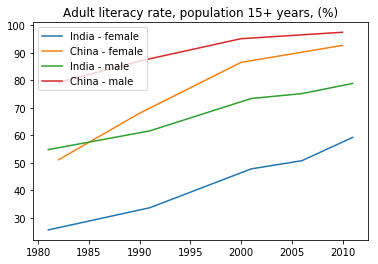

In [5]:
dp_IND_fem = df_IND[['IndicatorName', 'Year', 'Value']][df_IND['IndicatorName'] == 'Adult literacy rate, population 15+ years, female (%)']
dp_CHN_fem = df_CHN[['IndicatorName', 'Year', 'Value']][df_CHN['IndicatorName'] == 'Adult literacy rate, population 15+ years, female (%)']
dp_IND_mal = df_IND[['IndicatorName', 'Year', 'Value']][df_IND['IndicatorName'] == 'Adult literacy rate, population 15+ years, male (%)']
dp_CHN_mal = df_CHN[['IndicatorName', 'Year', 'Value']][df_CHN['IndicatorName'] == 'Adult literacy rate, population 15+ years, male (%)']

plt.title("Adult literacy rate, population 15+ years, (%)")
plt.plot(dp_IND_fem['Year'].values, dp_IND_fem['Value'].values, label='India - female')
plt.plot(dp_CHN_fem['Year'].values, dp_CHN_fem['Value'].values, label='China - female')
plt.plot(dp_IND_mal['Year'].values, dp_IND_mal['Value'].values, label='India - male')
plt.plot(dp_CHN_mal['Year'].values, dp_CHN_mal['Value'].values, label='China - male')
plt.legend(loc=2)
plt.show()


Great results for China reducing the gap between females and males.
On the 80's, China's gap between sexes was around 30%. On 2010, it dropeed to 5%.
India has also started with a 30% gap and it dropped to less than 20%.

###### Next steps
It would be interesting to see recent data:
* Are India and China keeping up the same positive pace? 
* Is Russian Federation keeping up his promise to eradicate illiteracy?
